# Exploiration de la dataset FD002


## Importation des bibliothèques et données pour faire de l'analyse descriptive

In [2]:
#pip install xgboost
#importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importation de bibliothèque Skelearn
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import absolute_mean_error

# Importation des données : données d'entrainement(data_train),données test (data_test), données de validation (data_RUL)
data_train= pd.read_csv("train_FD002.txt",sep=" ",header=None)
data_test = pd.read_csv("test_FD002.txt",sep=" ",header=None)
data_RUL = pd.read_csv("RUL_FD002.txt",sep=" ",header=None)

In [3]:
#Visionnage de la tête de la dataset d'entrainement
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,NaN,NaN


In [4]:
#vionnage de la summary de la dataset d'entrainement
data_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,0.0,0.0
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423,NaN,NaN
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500,NaN,NaN
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300,NaN,NaN
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200,NaN,NaN
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200,NaN,NaN
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100,NaN,NaN


In [5]:
#vionnage de la summary de la dataset test
data_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,...,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,0.0,0.0
mean,127.528346,81.223647,23.975176,0.571154,94.066665,472.930049,579.591704,1418.562090,1203.086538,8.039014,...,8063.638811,9.315214,0.023141,347.938807,2229.025301,97.764616,20.839067,12.503918,NaN,NaN
std,74.144727,58.892845,14.778958,0.310998,14.217415,26.454686,37.338929,105.979169,119.039415,3.623831,...,83.829038,0.747609,0.004642,27.759465,145.235683,5.356411,9.908785,5.944582,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.410000,1245.160000,1030.090000,3.910000,...,7851.310000,8.330200,0.020000,303.000000,1915.000000,84.930000,10.180000,6.123100,NaN,NaN
25%,65.000000,34.000000,10.004600,0.250600,100.000000,449.440000,549.480000,1351.640000,1122.520000,5.480000,...,8061.375000,8.663500,0.020000,330.000000,2212.000000,100.000000,13.990000,8.407150,NaN,NaN
50%,128.000000,70.000000,25.001300,0.700000,100.000000,462.540000,555.830000,1367.370000,1134.160000,7.050000,...,8080.280000,9.303500,0.020000,334.000000,2223.000000,100.000000,14.900000,8.938800,NaN,NaN
75%,189.000000,119.000000,35.008000,0.840000,100.000000,491.190000,607.260000,1498.300000,1305.455000,10.520000,...,8125.840000,9.374500,0.030000,369.000000,2324.000000,100.000000,28.520000,17.111200,NaN,NaN
max,259.000000,367.000000,42.008000,0.842000,100.000000,518.670000,644.320000,1609.690000,1434.120000,14.620000,...,8243.100000,11.030000,0.030000,398.000000,2388.000000,100.000000,39.320000,23.614100,NaN,NaN


In [6]:
#vionnage de la summary de la dataset de validation
data_RUL.describe()

,0,1
count,259.000000,0.0
mean,81.185328,NaN
std,53.882916,NaN
min,6.000000,NaN
25%,35.000000,NaN
50%,80.000000,NaN
75%,121.000000,NaN
max,194.000000,NaN


## Analyse descriptive

In [7]:
# on enlève les colonnes qui ne nous apporte aucune information concernant le cycles  à savoir les colonnes 
# 26 et 27 pour les données test et ceului d'entrainement 
#et la conlone 1 de la data RUL

data_train.drop(columns=[26,27],inplace=True)
data_test.drop(columns=[26,27],inplace=True)
data_RUL.drop(columns=[1],inplace=True)

In [8]:
# on affecte des noms aux columns de la dataset Test et entrainement
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

data_train.columns=columns
data_test.columns=columns

In [9]:
data_train.head()

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [10]:
#vionnage du resumé de la dataset d'entrainement

data_train.describe()

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,266.069034,2334.557253,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,137.659507,128.068271,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,129.120000,2027.610000,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,131.520000,2387.900000,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,183.200000,2388.080000,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,371.260000,2388.170000,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,523.370000,2390.480000,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100


In [11]:
#visionnage de la la structuration de la dataset d'entrainement
data_train_cycles = data_train.loc[:, 'unit_number':'time_in_cycles']
data_train_cycles

,unit_number,time_in_cycles
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
53754,260,312
53755,260,313
53756,260,314
53757,260,315


In [12]:
#Visionnage des lignes uniques de la dataset d'entraînement  
print("Unit_number " , data_train.unit_number.unique())

Unit_number  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 2

In [13]:
#vionnage du resumé des cycles maximales des 100 moteur de la dataset data_train 
data_train_max= data_train.groupby('unit_number')['time_in_cycles'].max().reset_index()
data_train_max.describe()


,unit_number,time_in_cycles
count,260.000000,260.000000
mean,130.500000,206.765385
std,75.199734,46.782198
min,1.000000,128.000000
25%,65.750000,174.000000
50%,130.500000,199.000000
75%,195.250000,230.250000
max,260.000000,378.000000


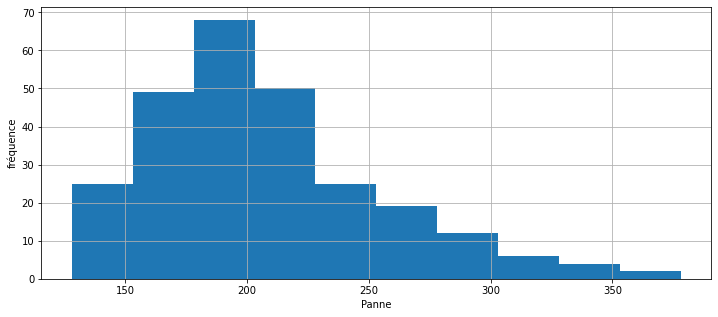

In [14]:
# histogramme des cycles maximales des 100 moteur de la dataset data_train 
data_train_max['time_in_cycles'].hist(bins=10, figsize=(12,5))
plt.xlabel('Panne')
plt.ylabel('fréquence')
plt.show()

### Calcul du RUL dans la dataset data_train (données d'entraînement)

In [15]:
# on regroupe la data train par moteur(unit_number ) et on récupére le maximun de chaque group
#L'ensemble est stocké dans data_train_cycles_panne

data_train_cycles_panne = pd.DataFrame(data_train.groupby('unit_number')['time_in_cycles'].max()).reset_index()
data_train_cycles_panne.columns = ['unit_number', 'failure']

# une fois la nouvelle data data_train_cycles_panne créée on la merge avec la data de depart, ici la data_train 
#afin de calculer la RUL

data_train=data_train.merge(data_train_cycles_panne,on=['unit_number'],how='left')
#calcul du RUL dans la dataset data_train
data_train['RUL']=data_train['failure']-data_train["time_in_cycles"]
data_train

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,failure,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,149,148
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,149,147
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,149,146
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,149,145
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,149,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,316,4
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,316,3
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,316,2
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,316,1


## Sélection des variables

### Corrélation entre les variables explicatives et la variable d'intérêt ici RUL du unit ayant le cycle le plus long la dataset d'entrainement

In [16]:
# matrice de correlation entre "RUL" et les paramètres opératoires
# on choisi ici le moteur qui a le cycle le plus long pour mieux étudier les corrélation 
# On utilise la fonction idxmax pour acceder à l'indice ayant  la valeur max 
# La méthode loc est utilisé ici pour avoir accès à cet id

id_moteurPerf= data_train.loc[data_train['time_in_cycles'].idxmax(),['unit_number','time_in_cycles']]
# L'id trouvé est la 112

# on cherche desormais à soir le nombre de ligne du moteur ayant l'id 112

moteur_perf= data_train.loc[data_train['unit_number']==112]
#moteur_perf

In [17]:
id_moteurPerf

unit_number       112.0
time_in_cycles    378.0
Name: 22987, dtype: float64

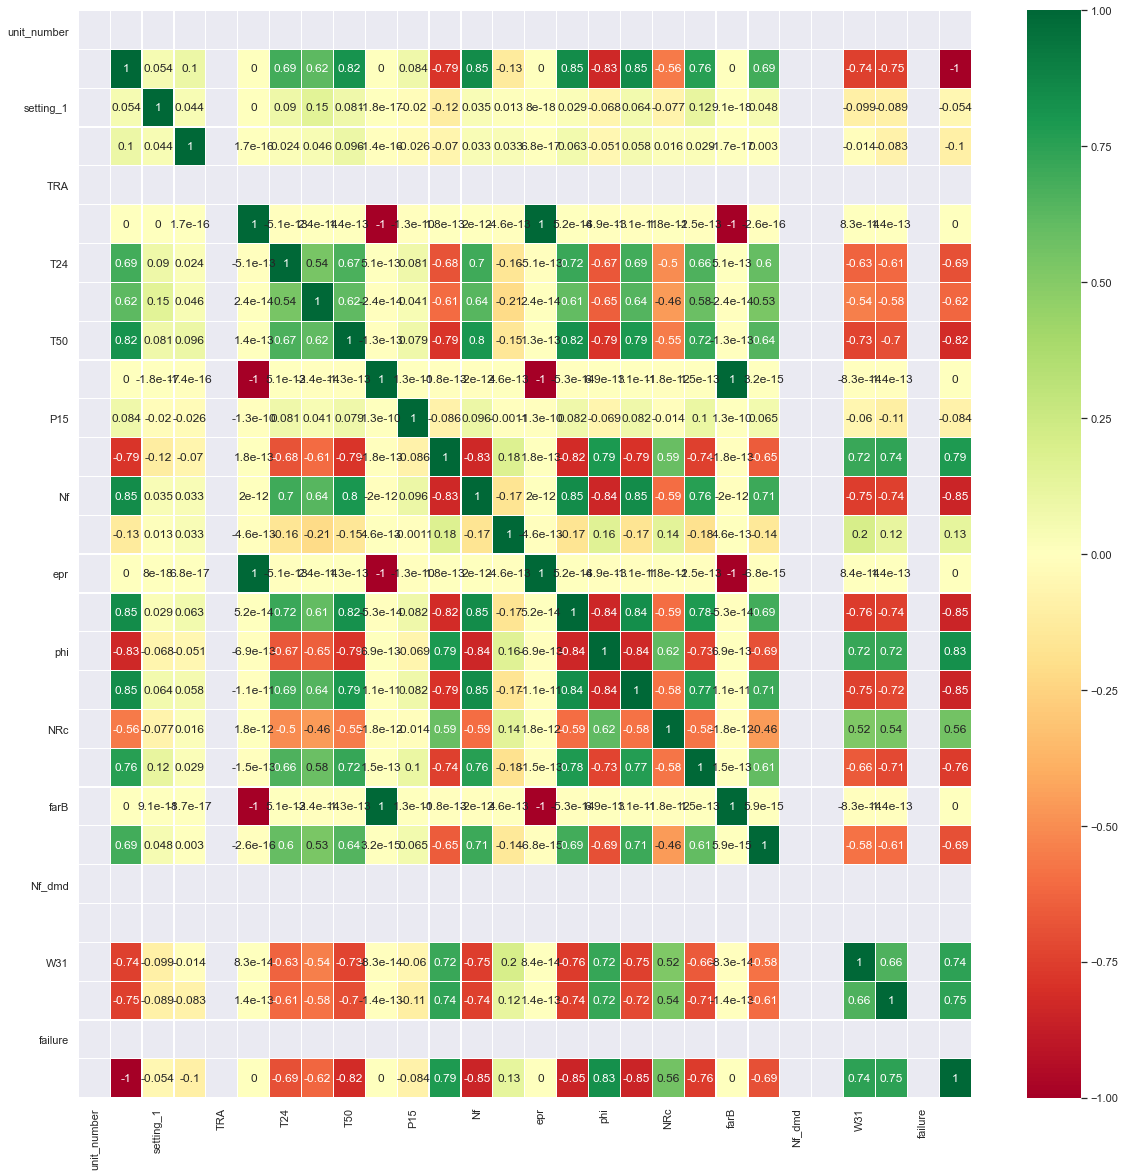

In [20]:
# matrice de correlation 
sns.set()
sns.heatmap(moteur_perf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()
# attention seulement les noms 1 colonnes sur 2 sont imprimés

### Corrélation entre les variables explicatives et la variable d'intérêt ici  RUL de la dataset d'entrainement

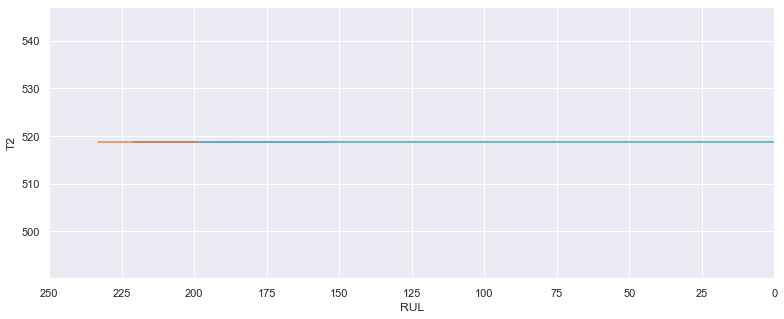

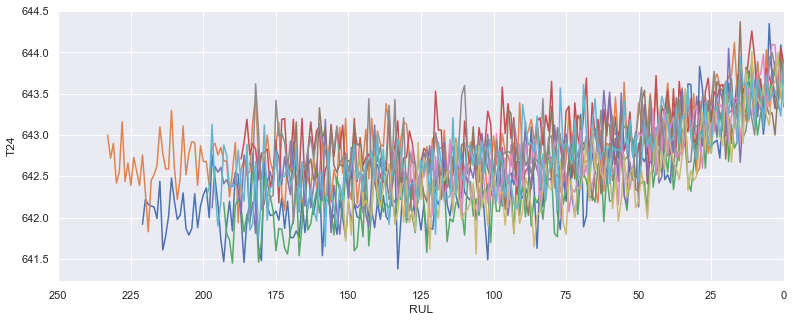

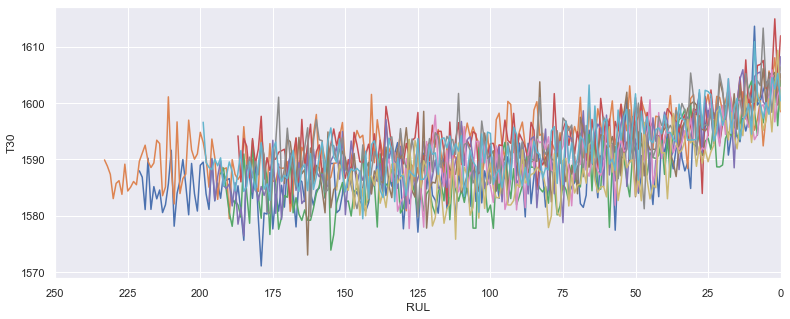

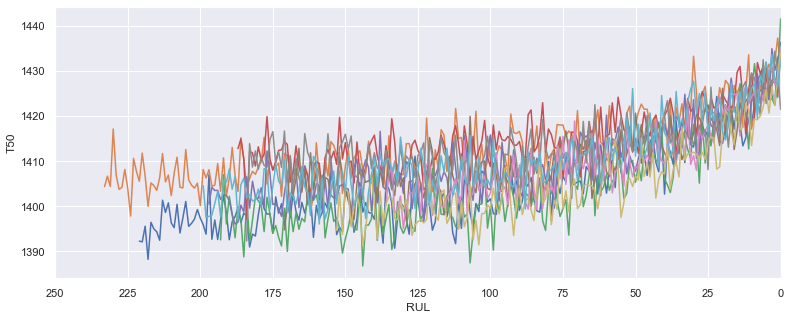

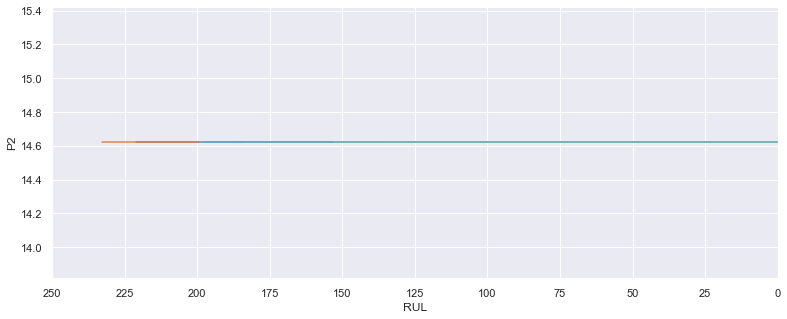

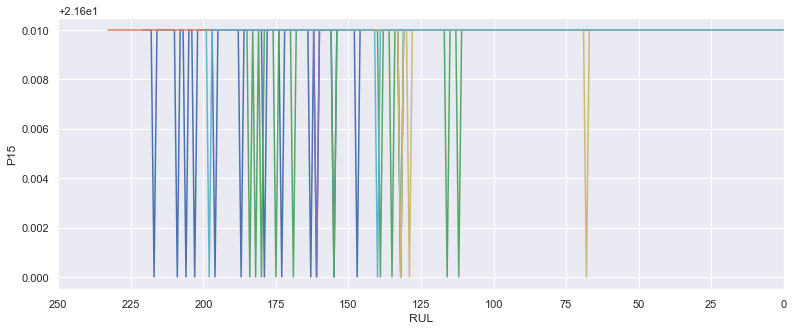

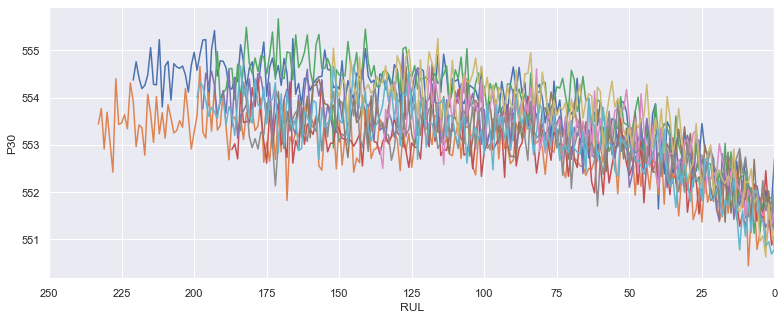

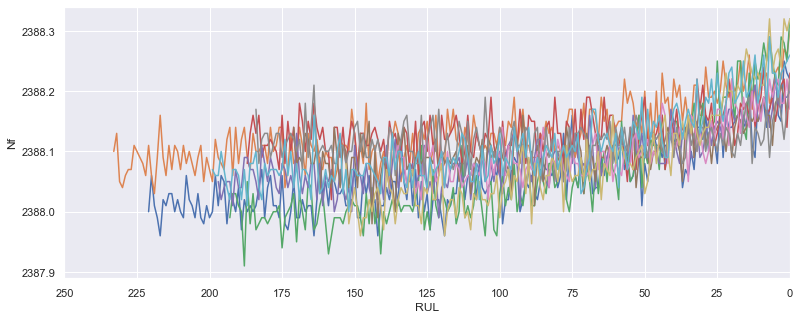

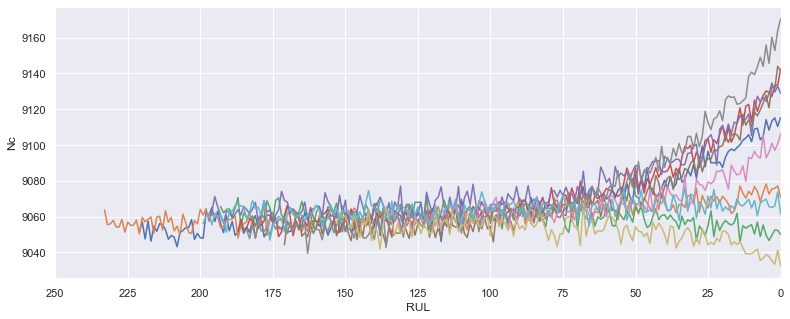

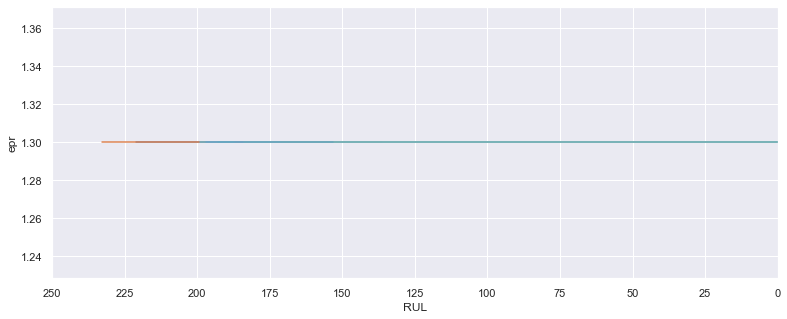

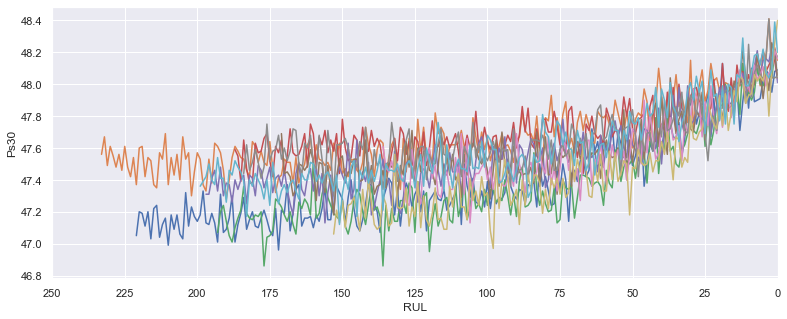

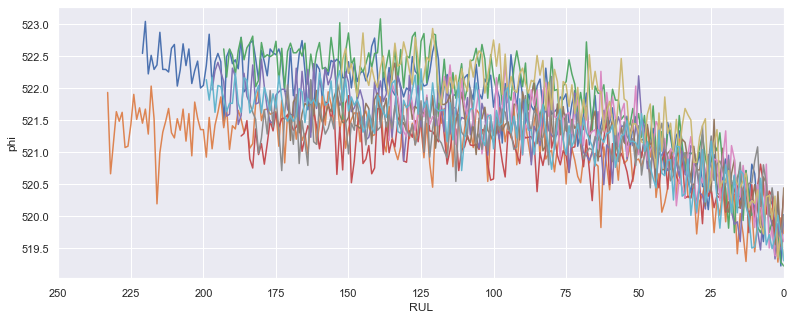

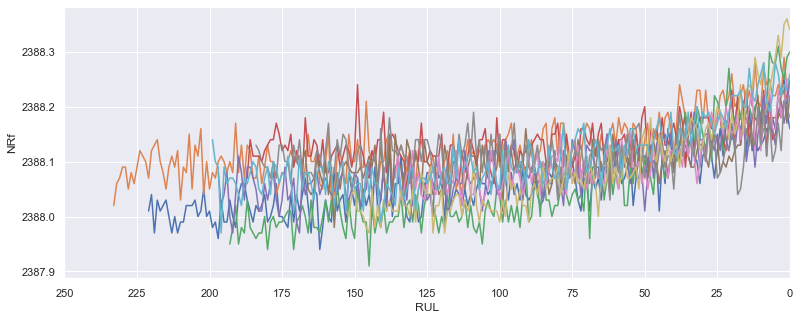

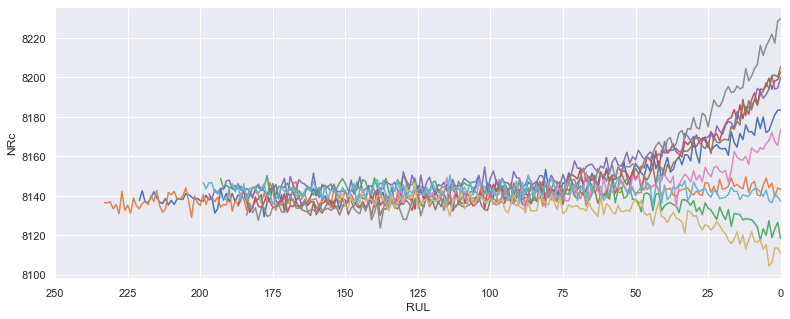

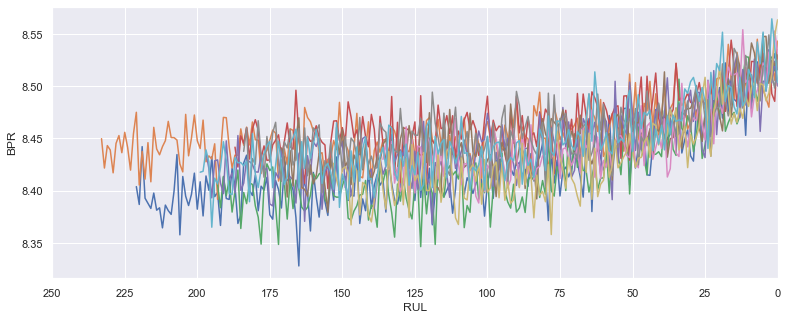

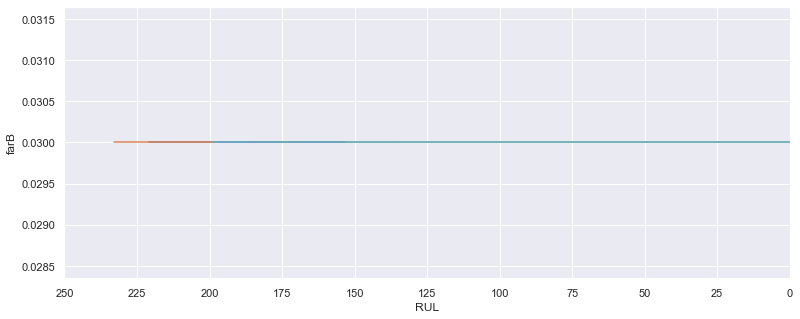

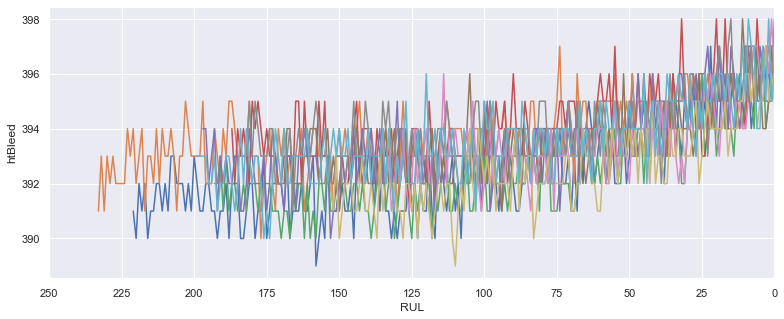

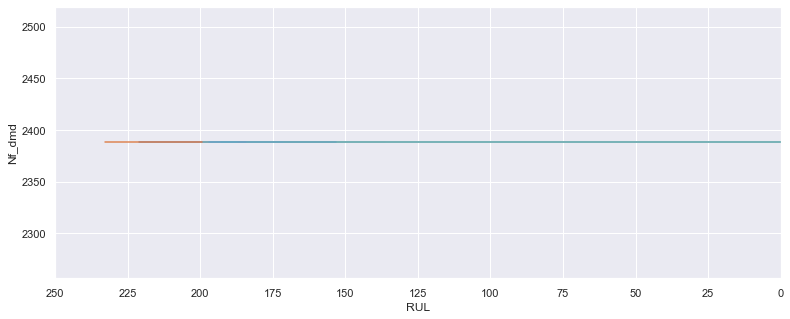

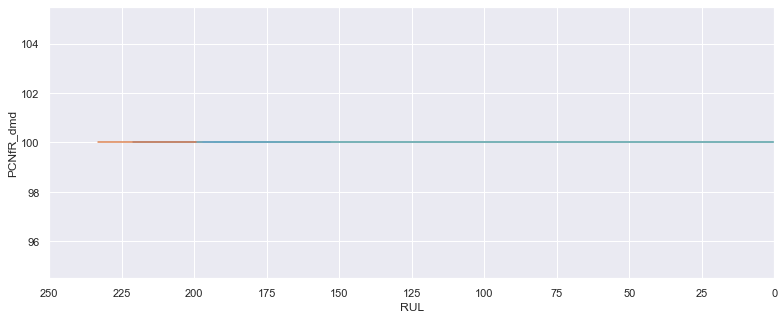

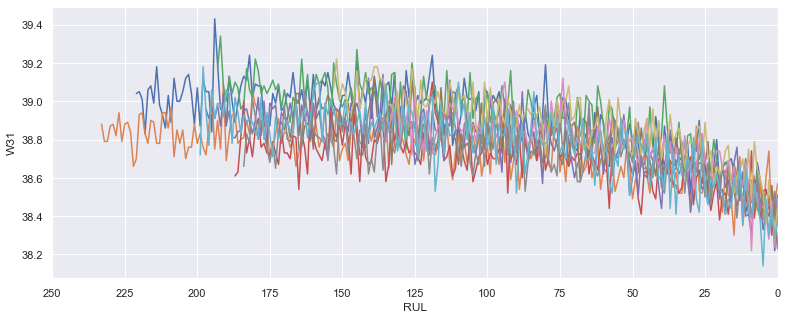

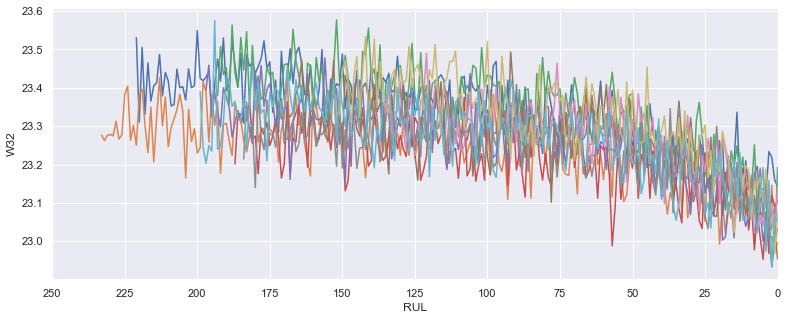

In [27]:
#varaiation du RUL des plusieur moteurs en fonction des capteurs
# on selectionnera uniquement 
capteurs=  ['T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

# on a bien 21 capteurs ( des outputs de 14 inputs)
#len(capteur)

def plot_sensor(capteur):
    plt.figure(figsize=(13,5))
    for i in data_train['unit_number'].unique():
       #ON TRACE ICI uniquement les moteurs dont les numéros sont multiples de 10
        if (i % 10 == 0):   
            plt.plot('RUL', capteur, 
                     data=data_train[data_train['unit_number']==i])
            # Nous inversons l'axe X afin que RUL diminue le long de l'axe, avec un RUL de zéro indiquant une panne de moteur.
    plt.xlim(250, 0)  
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(capteur)
    plt.xlabel('RUL')
    plt.show()

# on plot le RUL en fonction des capteurs
for capteur in capteurs:
    plot_sensor(capteur)


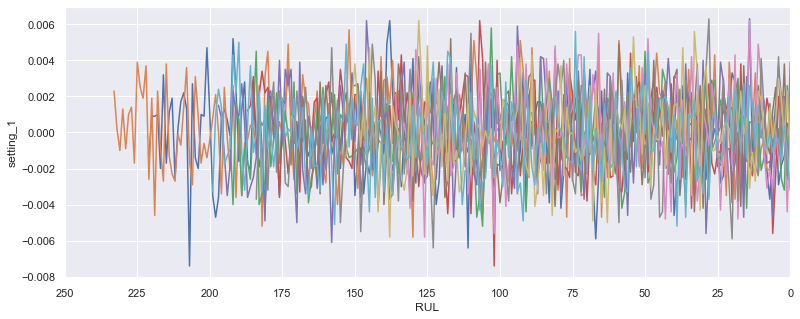

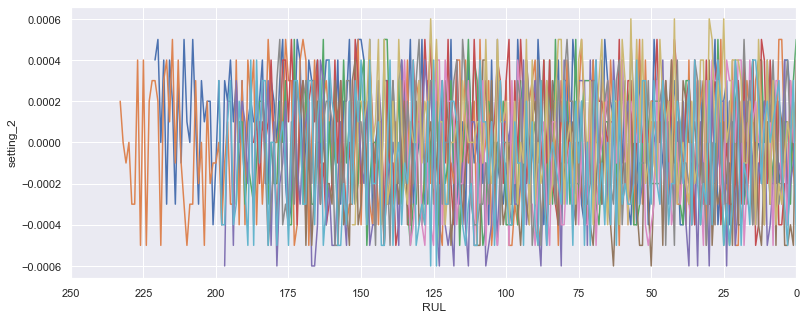

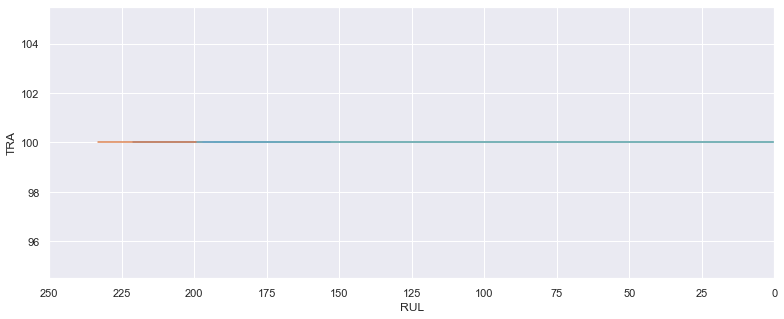

In [28]:
# paramètre de fonctionnement 
param_fonc = ['setting_1','setting_2','TRA']
for parm in param_fonc:
    plot_sensor(parm)

## Calcul de la panne dans la dataset data_test 

In [21]:
# on crée d'abord la colonne unit_number dans les données : data_RUL
columns_RUL = ['RUL_dernierMoteur']
data_RUL.columns = columns_RUL
data_RUL.insert(0, 'unit_number', range(1, 1 + len(data_RUL)))
data_RUL.head()



,unit_number,RUL_dernierMoteur
0,1,18
1,2,79
2,3,106
3,4,110
4,5,15


In [22]:
# on fait pareil (cf data_train) pour les données data_test 

# on regroupe la data_test par moteur(unit_number ) et on calcule le maximun de chaque group
data_test_cycles_MAX = pd.DataFrame(data_test.groupby('unit_number')['time_in_cycles'].max()).reset_index()
# on attribue au sein de la data_test_cycles_MAX les noms des colonnes suivantes: ' unit_number' et 'cycles Max '
data_test_cycles_MAX.columns = ['unit_number', 'cyclesMax_interme']
#data_test_cycles_MAX

# on merge tout d'abord la data_test avec la data_RUL précedenment créée pour avoir accèes à la colonne 'RUL' du dernier moteur
#
data_test=data_test.merge(data_RUL,on=['unit_number'],how='left')

# on merge ensuite la data_test avec data_test_cycles_MAX précedenment créée pour avoir accèes à la colonne 'cycles Max '
#Qui servivar à créer la colonnes panne 'Failure'
data_test=data_test.merge(data_test_cycles_MAX,on=['unit_number'],how='left')
# calcul du RUL 
data_test['failure']=data_test['cyclesMax_interme']+data_test['RUL_dernierMoteur']
data_test['RUL']=data_test['failure']-data_test['time_in_cycles']
#data_test.drop(columns=[26,33],axis=1,inplace=True)
#data_train.drop(columns=['RUL_dernierMoteur'],inplace=True)
#,'cyclesMax_interme','failure'
data_test.head()

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL_dernierMoteur,cyclesMax_interme,failure,RUL
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,0.03,369,2319,100.00,28.42,17.1551,18,258,276,275
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,0.02,364,2324,100.00,24.29,14.8039,18,258,276,274
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,0.02,333,2223,100.00,14.98,8.9125,18,258,276,273
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,0.02,332,2212,100.00,10.35,6.4181,18,258,276,272
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,0.02,305,1915,84.93,14.31,8.5740,18,258,276,271


In [23]:
#data_train["time_in_cycles"]
data_train_max

,unit_number,time_in_cycles
0,1,149
1,2,269
2,3,206
3,4,235
4,5,154
...,...,...
255,256,163
256,257,309
257,258,143
258,259,205


In [32]:
#data_train.to_excel('Entrainement.xlsx')

## Implémentation des modèles sur le jeu de données entraînement

In [24]:

Selection_colonne = ['setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]


#Partionnnement des données

X=data_train[Selection_colonne]
y= data_train['RUL']
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2,random_state=0)

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

#Fonction evaluation 

def evaluation(y_true, y_pred, label='test'):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_pred)
    mae=mean_absolute_error(y_true, y_pred)
    #Accuracy = average_precision_score(y_true, y_pred)  
    print('{} set RMSE:{} ,MAE:{}, R2:{}'.format(label, rmse,mae,variance))

### Implémentation de la régression Linéaire

In [25]:
#Instanciation du modèle Lineaire
model=LinearRegression()

#Entrainement du modèle avec 80% du jeu de données d'entraînement
model.fit(X_train,y_train )

#prédiction du modèle 
y_pred_train=model.predict(X_train)

#Evaluation du modèle 
evaluation(y_train ,y_pred_train,'train')

#prédiction du modèle en utilisant le 20% du jeu de données d'entraînement
y_pred_test=model.predict(X_valid)
#Evaluation du modèle 
evaluation(y_valid,y_pred_test)

train set RMSE:45.151766176819365 ,MAE:34.73390984859438, R2:0.5742153724520764
test set RMSE:44.54766666654544 ,MAE:34.33457933360944, R2:0.5844835894747148


### Implémentation du RF

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regressor param_dict
n_estimators = [10,25,40,55,70,85,100] # nombre des arbres
max_depth = [2,3,4,6,8,10,12] # profondeurs des arbres
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth}

# Instanciation du modèle Random Forest
rf = RandomForestRegressor()


rf_random = RandomizedSearchCV(estimator = rf,param_distributions= param_dict)

rf_random.fit(X_train,y_train )
#On cherche le meilleur modèle
rf_optimal_model = rf_random.best_params_


In [27]:
rf_optimal_model

{'n_estimators': 25, 'max_depth': 10}

In [28]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=25 , max_depth = 10)

#Entrainement du modèle avec 80% du jeu de données d'entraînement
model2.fit(X_train,y_train)

#prédiction du modèle
y_pred_train=model2.predict(X_train)
#Evaluation du modèle 
evaluation(y_train ,y_pred_train,'train')

#prédiction du modèle en utilisant le 20% du jeu de données d'entraînement
y_pred_test=model2.predict(X_valid)
#Evaluation du modèle
evaluation(y_valid,y_pred_test)

train set RMSE:42.454573232930976 ,MAE:30.929389894480366, R2:0.6235654728328393
test set RMSE:44.07267495673932 ,MAE:32.431176922896825, R2:0.5932972781840392


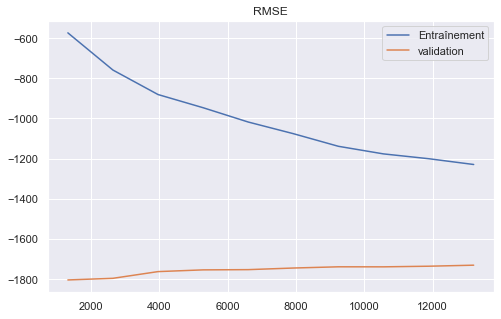

In [39]:
# tracage du Learning Curve Pour la visulatisation du sur-apprentissage ou pas du modèle avec le rmse
from sklearn.model_selection import learning_curve
N,train_score,val_score = learning_curve(model2,X_train,y_train,cv=5,train_sizes=np.linspace(0.1,1,10),scoring= 'neg_mean_squared_error' )
plt.figure(figsize=(8,5))
plt.plot(N,train_score.mean(axis=1))
plt.plot(N,val_score.mean(axis=1))
plt.title('RMSE')
plt.legend(('Entraînement','validation'), loc='upper right')

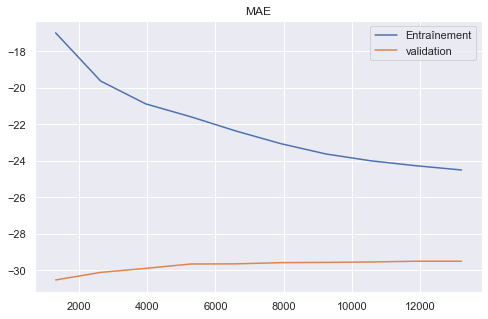

In [40]:
# tracage du Learning Curve Pour la visulatisation du sur-apprentissage ou pas du modèle MAE
from sklearn.model_selection import learning_curve
N,train_score,val_score = learning_curve(model2,X_train,y_train,cv=5,train_sizes=np.linspace(0.1,1,10),scoring= 'neg_mean_absolute_error' )
#Print du learning_curve
plt.figure(figsize=(8,5))
plt.plot(N,train_score.mean(axis=1))
plt.plot(N,val_score.mean(axis=1))
plt.title('MAE')
plt.legend(('Entraînement','validation'), loc='upper right')

### Implémentation du Xgboost

In [30]:
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBRegressor

Param_grid = { 'learning_rate': [0.1,0.2,0.25,0.3,0.4,0.5],
              'max_depth':[1,2,4,6,8,10,11,12,13,14],
              'n_estimators':[10,25,40,55,70,100,125,150],
              'subsample':[0.1,0.2,0.4,0.6,0.8,1]
              
             }

# Recherche du modèle du Xgboost ayant ayant les meilleurs hyperparamètres
grid= RandomizedSearchCV(XGBRegressor(),Param_grid,cv=5)
grid.fit(X_train,y_train)

#On visualise le modèle optimisé
grid.best_score_
grid.best_params_

#On sauvegarde la grille avec les meilleurs performance
Model3=grid.best_estimator_

#On visualise le modèle optimisé
Model3


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.2,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
grid.best_params_

{'subsample': 0.2, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1}

In [34]:
import xgboost
from xgboost import XGBRegressor
model3= XGBRegressor(learning_rate=0.1,subsample=0.6,n_estimators=100, max_depth = 6)

#Entrainement du modèle avec 80% du jeu de données d'entraînement
model3.fit(X_train,y_train)

#prédiction du modèle 
y_pred_train=model3.predict(X_train)
#Evaluation du modèle
evaluation(y_train ,y_pred_train,'train')

#prédiction du modèle 
y_pred_test=model3.predict(X_valid)
#Evaluation du modèle dans la dataset data_train
evaluation(y_valid,y_pred_test)

train set RMSE:40.0241432949238 ,MAE:29.41291197805108, R2:0.665431860637772
test set RMSE:42.845766969874376 ,MAE:31.35716118496826, R2:0.6156259136859938


## Implémentation du Random Forest sur le données_test

In [ ]:
x_test = data_test[Selection_colonne]
y_test = data_test['RUL']

In [ ]:

y_pred_test=model2.predict(x_test)

In [ ]:
y_pred_test.shape

In [ ]:
data1= pd.DataFrame(x_test)


In [ ]:
data1.head()

In [ ]:
data1['y_test']=y_test

In [ ]:
data1['y_pred_test']=y_pred_test

In [ ]:
unit_number =data_test['unit_number']
time_in_cycles=data_test['time_in_cycles']

In [ ]:
data1['unit_number']=unit_number

data1['time_in_cycles']=time_in_cycles

In [ ]:
data1.head()

In [ ]:
plt.figure(figsize=(13,5))
for i in data1['unit_number'].unique():
        #ON TRACE ICI uniquement les moteurs dont les numéros sont multiples de 5
        if (i % 5 == 0):
            data2=data1[data1['unit_number']==i]

            plt.scatter(data2['time_in_cycles'],data2['y_test'])
            plt.scatter(data2['time_in_cycles'],data2['y_pred_test'])
            
            plt.legend(('Réel', 'Prédiction'), loc='upper right')
            plt.title('Comparaison entre la prédiction et le réel ')
            
            plt.ylabel('RUL')
            plt.xlabel('Cycles')
            plt.show()

In [ ]:
#on Recuper les dernier points des srie temporelle du data_test car on veut prédire le RUL dans 
test = data_test[data_test['time_in_cycles'] == data_test['cyclesMax_interme']].reset_index()

x_test_dernierM = test[Selection_colonne]
y_test_dernierM = test['RUL']
y_pred_test=model2.predict(x_test_dernierM)

# On plote ce qu'il faut 
plt.scatter(test['unit_number'],y_test_dernierM)
plt.scatter(test['unit_number'],y_pred_test)
            
plt.legend(('Réel', 'Prédiction'), loc='upper right')
plt.title('Comparaison entre la prédiction et le réel ')
            
plt.ylabel('RUL')
plt.xlabel('moteur')
plt.show()

In [ ]:
#Evaluation du RF sur le jeu de données test
evaluation(y_test_dernierM,y_pred_test)

### Implémentation du xgboost sur le jeu de données test 

In [ ]:
#on Recuper les dernier points des srie temporelle du data_test car on veut prédire le RUL dans 
test = data_test[data_test['time_in_cycles'] == data_test['cyclesMax_interme']].reset_index()

x_test_dernierM = test[Selection_colonne]
y_test_dernierM = test['RUL']
y_pred_test=model3.predict(x_test_dernierM)
# On plote ce qu'il faut 
plt.scatter(test['unit_number'],y_test_dernierM)
plt.scatter(test['unit_number'],y_pred_test)
            
plt.legend(('Réel', 'Prédiction'), loc='upper right')
plt.title('Comparaison entre la prédiction et le réel ')
            
plt.ylabel('RUL')
plt.xlabel('moteur')
plt.show()

In [ ]:
# Evaluation du modèle sur le jeu de donnée test
evaluation(y_test_dernierM,y_pred_test)

In [ ]:
data_train.head()

In [ ]:
data_train.describe()

In [ ]:
data_test.loc[data_test['unit_number']==4][['unit_number','time_in_cycles']]

In [ ]:
data_RUL.head()